# Census Income Project

### Import Libraries

In [1]:
# Data processing packages
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df=pd.read_csv('../Datasets/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Project Description

This data was extracted from the 1994 Census bureau database (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

The target variable in the data set is income level, which shows whether a person earns more than 50,000 per year or not, based on 14 features containing information on age, education, education-num, gender, native-country, marital status, final weight, occupation, work classification, gender, race, hours-per-week, capital loss, and capital gain.

The target variable (income) will be represented by binary classes and hence it is a classification problem.

In [3]:
#Checking the dataset shape
df.shape

(32560, 15)

Dataset is having 32560 rows and 15 columns (14 input features and 1 output feature).

In [4]:
# Checking columns
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Columns names are displayed where 'Income' is the target variable and all other are independent variables.

In [5]:
# Checking datatypes
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Here, we can see columns are of type object and integer i.e. both categorical and numeric columns are there.

In [6]:
# Checking dataset schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


It gives additional information regarding the dataset like RangeIndex, Data columns, datatypes. We can see there is no null values in the dataset.

### Data Preprocessing

In [7]:
# Checking which all column values are relevant for model training
for i in df.columns :
    print(i)
    print('Unique values : ',df[i].nunique())
    print('Value counts  : ',df[i].value_counts())
    print('----------------------')

Age
Unique values :  73
Value counts  :  36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
----------------------
Workclass
Unique values :  9
Value counts  :   Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
----------------------
Fnlwgt
Unique values :  21647
Value counts  :  203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64
----------------------
Education
Unique values :  16
Value counts  :   HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-a

These columns seem significant to the model, but columns Workclass,Occupation,Native_country has 1836,1843,583 records respectively with value as '?', we need to treat this as null. 

Education and Education_num columns corresponds to each other hence we can drop any one of these.

Target column has 2 values but value counts have a huge difference hence there is class imbalance issue.

In [8]:
# Checking for ' ?' value
a=df[df['Workclass']==' ?']['Workclass'].count()
b=df[df['Occupation']==' ?']['Occupation'].count()
c=df[df['Native_country']==' ?']['Native_country'].count()
print(a,b,c)

1836 1843 583


In [9]:
# Checking invalid value in Workclass
#print(df.loc[df['Workclass'].isin([' ?'])].count())
df.loc[(df['Workclass'].isin([' ?']))&(df['Occupation'].isin([' ?']))]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


We can see all the rows of Workclass having ' ?' also have ' ?' in Occupation.

In [10]:
df.loc[(~df['Workclass'].isin([' ?']))&(df['Occupation'].isin([' ?']))]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
5360,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10844,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14771,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20336,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23231,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32303,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32313,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


Here, we checked for the Occupation=' ?' where Workclass value is Never-worked. For these values, Capital_gain & Capital_loss is 0, all are from United-States with Income <=50K.

In [11]:
df[df['Native_country']==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


Checked for Native_country having ' ?' in 583 records.

In [12]:
# Treating the null values
df['Workclass'].replace(' ?',' Private',inplace=True)
df['Occupation'].replace(' ?',' Prof-specialty',inplace=True)
df.drop(df[df['Native_country']==' ?'].index,inplace=True)
#df['Native_country'].replace(' ?',' United-States',inplace=True)

In [13]:
# Checking for ' ?' value
a=df[df['Workclass']==' ?']['Workclass'].count()
b=df[df['Occupation']==' ?']['Occupation'].count()
c=df[df['Native_country']==' ?']['Native_country'].count()
print(a,b,c)

0 0 0


All the ' ?' values are treated wth mode of the respective column.

In [14]:
# Checking shape of new dataset
df.shape

(31977, 15)

In [15]:
# Checking for the duplicates in the dataset
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
21489,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K


In [16]:
duplicate.count()

Age               23
Workclass         23
Fnlwgt            23
Education         23
Education_num     23
Marital_status    23
Occupation        23
Relationship      23
Race              23
Sex               23
Capital_gain      23
Capital_loss      23
Hours_per_week    23
Native_country    23
Income            23
dtype: int64

There are 23 duplicate values in the dataset

In [17]:
#Sorting the values
df.sort_values(['Age','Fnlwgt'],inplace=True)

In [18]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
18592,17,Private,19752,11th,7,Never-married,Other-service,Own-child,Black,Female,0,0,25,United-States,<=50K
31958,17,Private,24090,HS-grad,9,Never-married,Exec-managerial,Own-child,White,Female,0,0,35,United-States,<=50K
21199,17,Private,25051,10th,6,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
24403,17,Private,25690,10th,6,Never-married,Other-service,Own-child,White,Female,0,0,10,United-States,<=50K
5827,17,Private,27032,10th,6,Never-married,Sales,Own-child,White,Female,0,0,12,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18412,90,Private,313749,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
32276,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
4069,90,Private,313986,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
6623,90,Private,313986,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


Deleted the duplicate rows with keeping the first record out of each and now dataset is having 31954 rows and 15 columns.

In [19]:
# Dropping Education column as it copletely corresponds to Education_num column
df.drop('Education',axis=1,inplace=True)
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
18592,17,Private,19752,7,Never-married,Other-service,Own-child,Black,Female,0,0,25,United-States,<=50K
31958,17,Private,24090,9,Never-married,Exec-managerial,Own-child,White,Female,0,0,35,United-States,<=50K
21199,17,Private,25051,6,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
24403,17,Private,25690,6,Never-married,Other-service,Own-child,White,Female,0,0,10,United-States,<=50K
5827,17,Private,27032,6,Never-married,Sales,Own-child,White,Female,0,0,12,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18412,90,Private,313749,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
32276,90,Private,313749,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
4069,90,Private,313986,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
6623,90,Private,313986,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


### EDA and Visualizations

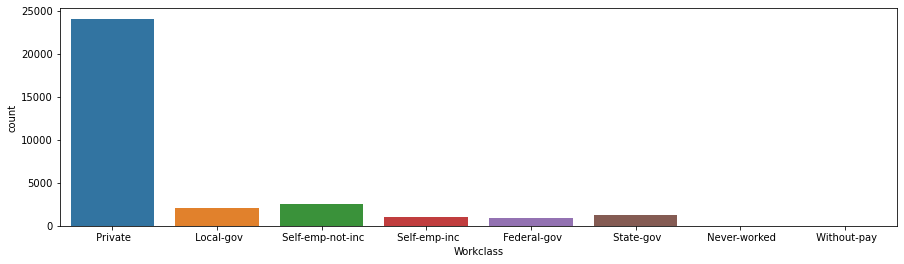

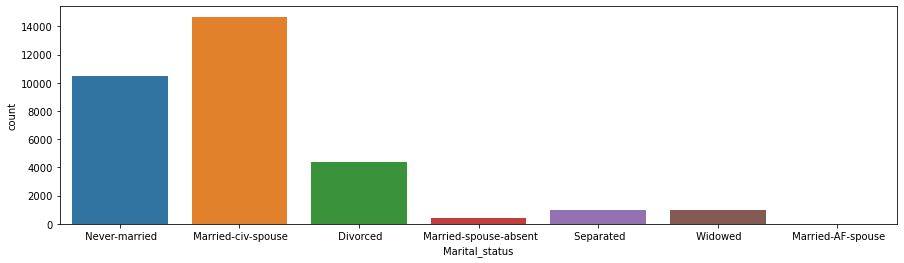

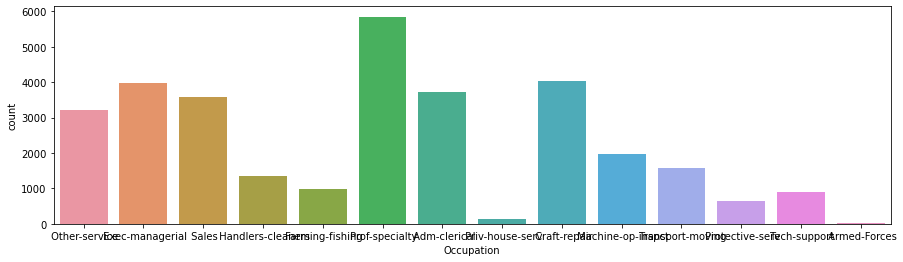

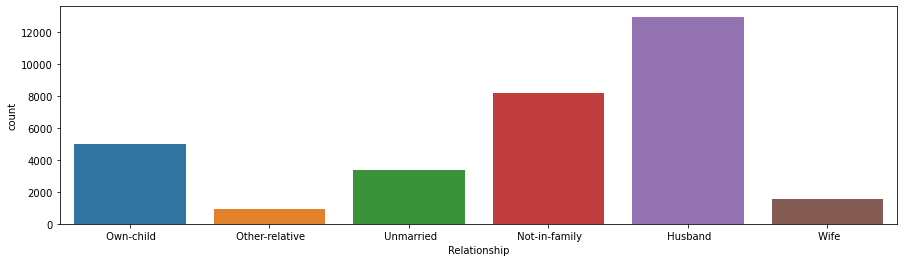

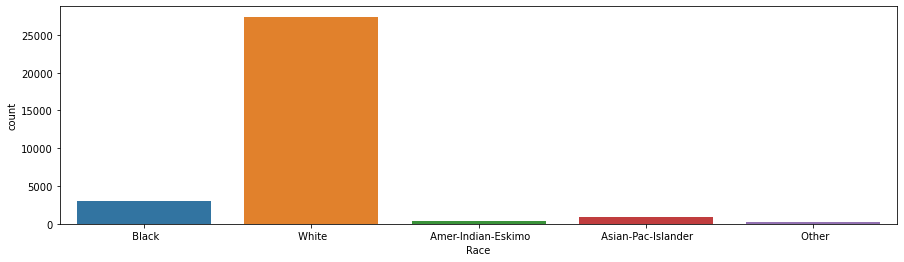

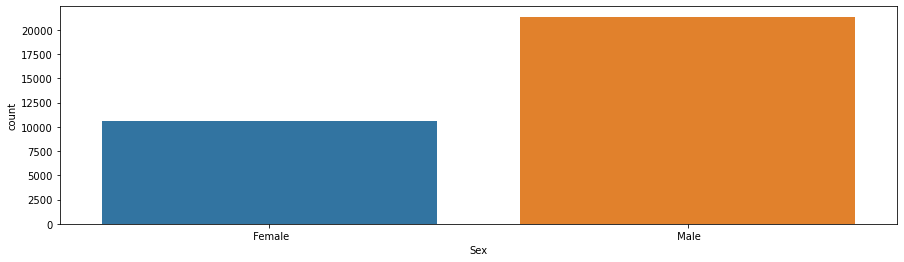

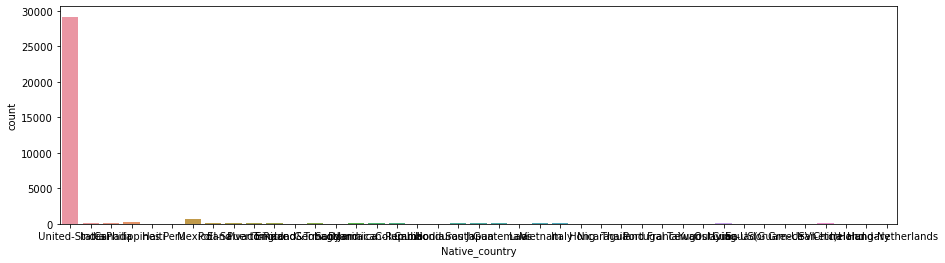

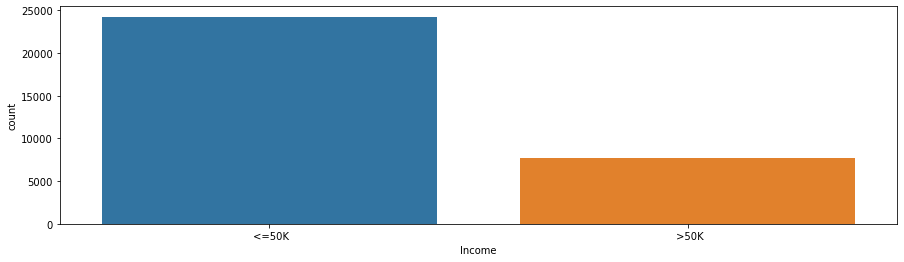

In [20]:
# Visualizing value counts for object type the columns
for i in df.columns :
    if df[i].dtypes=='object' :
        plt.figure(figsize=(15,4))
        sns.countplot(df[i])
        plt.show()

With the countplot we can see that Private Workclass has the highest number of people workin and least for never-worked.

Education as HS Grad has highest number of employees.

Most employees are having Married-civ-spouse and least with Married-AF-spouse.

Husbands have highest count.

Race as white is in majority and other options has a huge gap in counts.

Males are around double than females comparatively.

Majority of the employees are from United States and there are few people from other Native_country comparatively.

Income <=50k has a huge count than >50K and since this is a target variable this columns needs class balancing.

In [21]:
# Checking null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values in the dataset.

<AxesSubplot:>

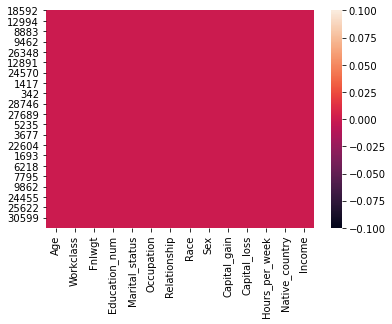

In [22]:
# Visualizing nulls
sns.heatmap(df.isnull())

Heatmap showing 0 null values in the dataset.

In [23]:
# Describe dataset
df.describe()
#df.describe(include='all')

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,31954.000000,3.195400e+04,31954.000000,31954.000000,31954.000000,31954.000000
mean,38.582713,1.897187e+05,10.072260,1065.092007,86.804500,40.420761
std,13.659696,1.057307e+05,2.559505,7301.278238,401.738054,12.344739
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783105e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.373200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Age column ranges from 17 to 90, Fnlwgt ranges from 12285 to 1484705, Education_num has range of 1 to 16, Capital_gain starts from 0 and ends at 99999, Capital_loss starts with 0 and ends with 4356, Hours_per_week ranges between 1 to 99.

Age,Fnlwgt have mean>median hence slight right skewness is there and the difference between 75% and max values are not much hence outliers might not be there. 

Standard deviation seem high for Capital_gain and Capital_loss. Also they are right skewed (mean>median).
These columns also have outliers as there is huge difference in 75% and max values.

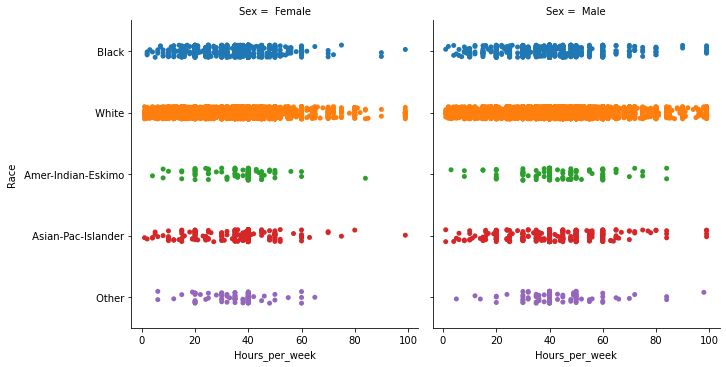

In [24]:
# Category plot for categorical data
sns.catplot(x='Hours_per_week',y='Race',data=df, col='Sex')

Female workers decreases for all the race when hours_per_week exceed beyonf 60. White race has the highest number of employees in both male and female category. Male workers are more in each race than females.

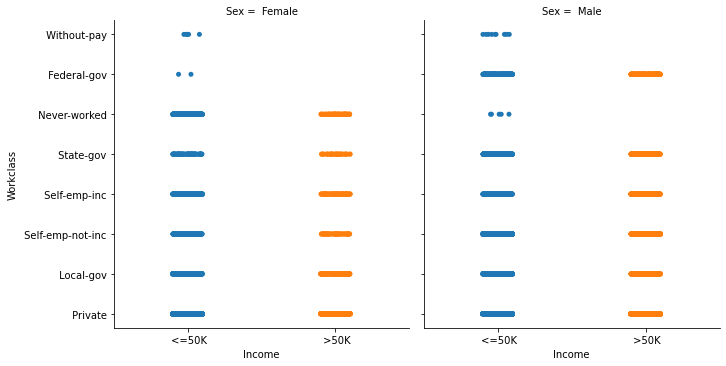

In [25]:
sns.catplot(x='Income',y='Workclass',data=df, col='Sex')

There are no females in Without-pay and Federal-gov who have income >50k and least no. of females with <=50k income are in Federal-gov. There are no males in Without-pay and Never-worked who have income >50k and least no. of males with <=50k income are in Never-worked workclass followed by Without-pay. 

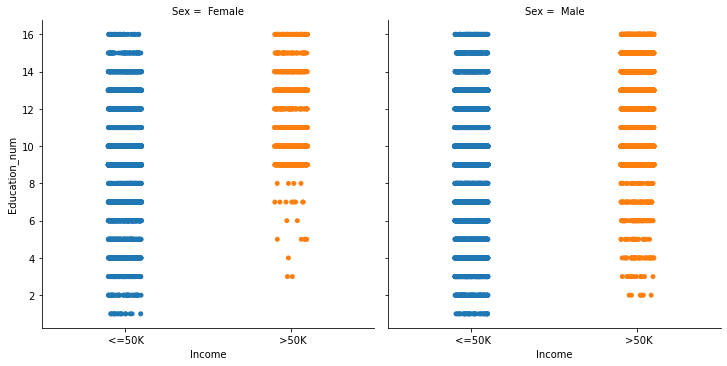

In [26]:
sns.catplot(x='Income',y='Education_num',col='Sex',data=df)

Females with education number below 8 are few comparatively who are having income of >50k. Males with education number below 4 are few comparatively who are having income of >50k.

In [27]:
# Pivot table showing counts
pd.crosstab(df['Income'],df['Workclass'])

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
Income,,,,,,,,
<=50K,578,1458,7,19012,474,1784,934,14
>50K,365,609,0,5061,600,714,344,0


Highest number of employees are in 'Private' workclass following 'self-emp-not-inc' and then in 'Local-gov' workclass for both the categories of income i.e. >50k and <=50k. 

In [28]:
pd.crosstab(df['Income'],df['Occupation'])

Occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
Income,,,,,,,,,,,,,,
<=50K,3220,8,3117,2054,872,1266,1720,3077,140,3853,434,2614,633,1253
>50K,498,1,908,1937,115,83,244,132,1,1997,210,970,278,319


Highest number of workers are in 'Prof-specialty' Occupation for both the categories of income i.e. >50k and <=50k. Least workers with <=50K income are in 'Armed-Forces' and with Income >50k are in 'Armed-Forces' and 'Priv-house-serv'.

In [29]:
pd.crosstab(df['Income'],df['Education_num'])

Education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Income,,,,,,,,,,,,,,,,
<=50K,49,155,303,589,480,860,1108,386,8701,5809,1009,793,3038,737,145,99
>50K,0,6,14,37,26,61,59,31,1661,1369,357,262,2169,936,414,291


Good number of employees with Income >50k are having 'Education_num' above 9 and most are having 'Education_num' as 13. With 'Income' <=50k high number of workers are having 'Education_num' 8,10,13,7,11 sequentially.

In [30]:
# Dividing the data in categorical and numeric columns
# Categorical data
df_cat=df.select_dtypes(include='object')
df_cat

,Workclass,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
18592,Private,Never-married,Other-service,Own-child,Black,Female,United-States,<=50K
31958,Private,Never-married,Exec-managerial,Own-child,White,Female,United-States,<=50K
21199,Private,Never-married,Other-service,Own-child,White,Male,United-States,<=50K
24403,Private,Never-married,Other-service,Own-child,White,Female,United-States,<=50K
5827,Private,Never-married,Sales,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...
18412,Private,Never-married,Prof-specialty,Own-child,White,Female,United-States,<=50K
32276,Private,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
4069,Private,Never-married,Handlers-cleaners,Own-child,White,Male,United-States,<=50K
6623,Private,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K


In [31]:
# Continuous data
df_con=df.select_dtypes(exclude='object')
df_con

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
18592,17,19752,7,0,0,25
31958,17,24090,9,0,0,35
21199,17,25051,6,0,0,16
24403,17,25690,6,0,0,10
5827,17,27032,6,0,0,12
...,...,...,...,...,...,...
18412,90,313749,13,0,0,10
32276,90,313749,9,0,0,25
4069,90,313986,7,0,0,40
6623,90,313986,7,0,0,40


In [32]:
# Checking outliers
from scipy.stats import zscore

z=np.abs(zscore(df_con))
np.where(z>3)

(array([   61,    72,    97, ..., 31951, 31952, 31953], dtype=int64),
 array([4, 4, 4, ..., 0, 0, 0], dtype=int64))

In [33]:
# Checking the outlier in the dataset
z[61][4]

4.067877203194249

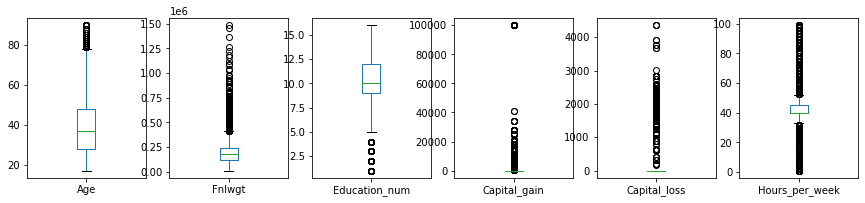

In [34]:
# Visualising outliers
df_con.plot(kind='box',subplots=True,layout=(3,8), figsize=(20,10))
plt.show()

Plot showing there are presence of outliers in the columns.

In [35]:
# Checking skewness
df_con.skew()

Age                0.555880
Fnlwgt             1.448880
Education_num     -0.304830
Capital_gain      12.062505
Capital_loss       4.607498
Hours_per_week     0.228092
dtype: float64

Skewness is present in the dataset as acceptable range is +/-5.

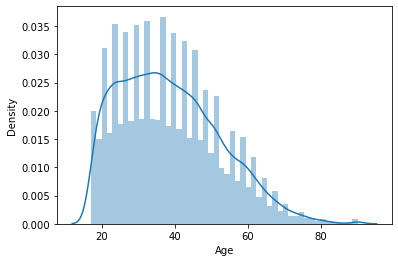

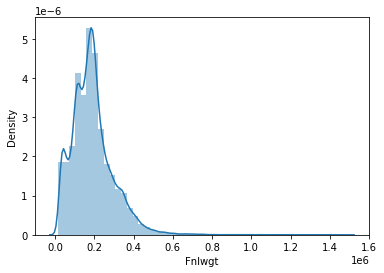

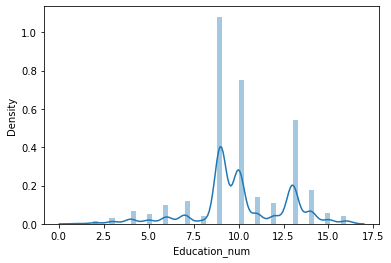

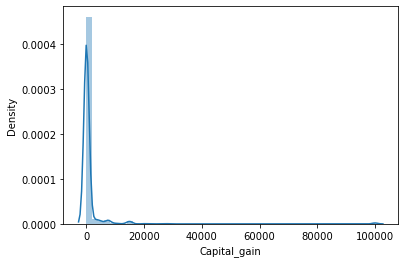

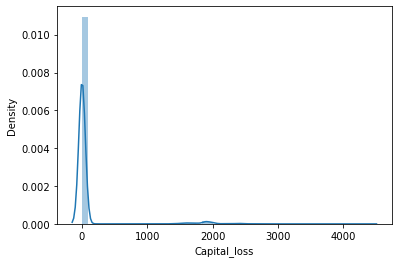

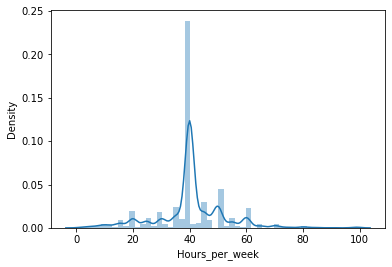

In [36]:
# Visualizing skewness
for i in df_con.columns :
    sns.distplot(df_con[i])
    plt.show()

Data is skewed in columns : Fnlwgt,Education_num,Capital_gain,Capital_loss

### Data Cleaning

In [37]:
# Removing outliers

df1=df_con.copy()
df1=df_con[(z<3).all(axis=1)]
df1

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
18592,17,19752,7,0,0,25
31958,17,24090,9,0,0,35
21199,17,25051,6,0,0,16
24403,17,25690,6,0,0,10
5827,17,27032,6,0,0,12
...,...,...,...,...,...,...
19827,79,172220,4,2964,0,30
26241,79,183686,13,0,0,20
21342,79,266119,13,0,0,40
14902,79,309272,9,0,0,40


In [38]:
# Printing shape of dataset before and after removing outliers
print('Shape of original dataset : ',df_con.shape)
print('Shape of dataset after removing outliers : ',df1.shape)

Shape of original dataset :  (31954, 6)
Shape of dataset after removing outliers :  (29296, 6)


In [39]:
# Percentage Data lost
data_percent=(31954-29296)/31954*100
data_percent

8.318207423170808

Approx 8% data is lost after removing the outliers.

In [40]:
# Checking skewness after removing outliers
df1.skew()

Age                0.490264
Fnlwgt             0.633843
Education_num     -0.165541
Capital_gain       4.944427
Capital_loss      29.395159
Hours_per_week    -0.355376
dtype: float64

We can see now skewness is present in the columns : Fnlwgt, Capital_gain, Capital_loss

In [41]:
# Removing skewness
df2=df1.copy()
skew_list=['Age','Capital_gain', 'Capital_loss']
for i in skew_list :
    df2[i]=np.log(df1[i]+1)
print(df2.skew())

Age               -0.121637
Fnlwgt             0.633843
Education_num     -0.165541
Capital_gain       3.117230
Capital_loss      24.884921
Hours_per_week    -0.355376
dtype: float64


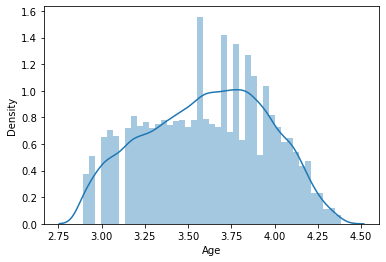

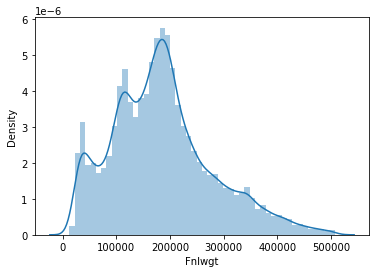

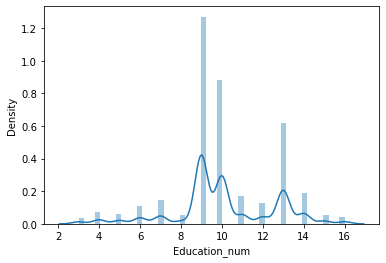

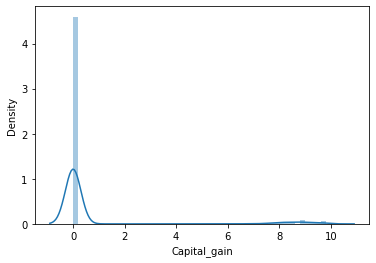

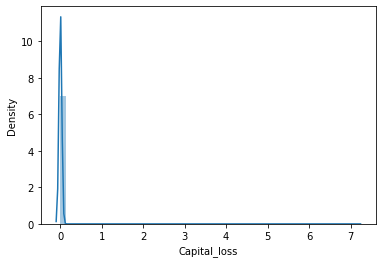

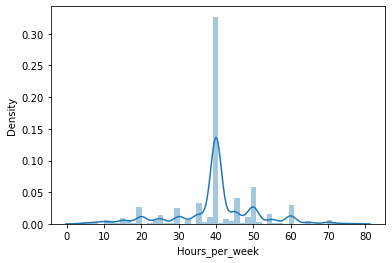

In [43]:
# Visualizng skewness
for i in df2.columns :
    sns.distplot(df2[i])
    plt.show()

Removed skewness from all columns but in Fnlwgt skewness is increasing on further applying any transformations and n columns Capital_gain,Capital_loss no significant change is seen on further removing skewness due to the kind of data distribution. Hence we can consider the present values as skewness threshold.

In [44]:
# Checking the new dataset
df2

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
18592,2.890372,19752,7,0.000000,0.0,25
31958,2.890372,24090,9,0.000000,0.0,35
21199,2.890372,25051,6,0.000000,0.0,16
24403,2.890372,25690,6,0.000000,0.0,10
5827,2.890372,27032,6,0.000000,0.0,12
...,...,...,...,...,...,...
19827,4.382027,172220,4,7.994632,0.0,30
26241,4.382027,183686,13,0.000000,0.0,20
21342,4.382027,266119,13,0.000000,0.0,40
14902,4.382027,309272,9,0.000000,0.0,40


### Apply encoding on categorical columns

In [45]:
# Checking for the unique values
for i in df_cat.columns :
    print(i)
    print(df_cat[i].unique())

Workclass
[' Private' ' Local-gov' ' Self-emp-not-inc' ' Self-emp-inc'
 ' Federal-gov' ' State-gov' ' Never-worked' ' Without-pay']
Marital_status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Widowed' ' Married-AF-spouse']
Occupation
[' Other-service' ' Exec-managerial' ' Sales' ' Handlers-cleaners'
 ' Farming-fishing' ' Prof-specialty' ' Adm-clerical' ' Priv-house-serv'
 ' Craft-repair' ' Machine-op-inspct' ' Transport-moving'
 ' Protective-serv' ' Tech-support' ' Armed-Forces']
Relationship
[' Own-child' ' Other-relative' ' Unmarried' ' Not-in-family' ' Husband'
 ' Wife']
Race
[' Black' ' White' ' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Other']
Sex
[' Female' ' Male']
Native_country
[' United-States' ' India' ' Canada' ' Philippines' ' Haiti' ' Peru'
 ' Mexico' ' Poland' ' El-Salvador' ' Puerto-Rico' ' England'
 ' Trinadad&Tobago' ' Germany' ' Scotland' ' Jamaica'
 ' Dominican-Republic' ' Columbia' ' Cambodia' ' Honduras' ' South'
 

In [46]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
df_cat_enc=df_cat.copy()
le=LabelEncoder()
for i in df_cat_enc.columns :
    df_cat_enc[i]=le.fit_transform(df_cat[i])
df_cat_enc

,Workclass,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
18592,3,4,7,3,2,0,38,0
31958,3,4,3,3,4,0,38,0
21199,3,4,7,3,4,1,38,0
24403,3,4,7,3,4,0,38,0
5827,3,4,11,3,4,0,38,0
...,...,...,...,...,...,...,...,...
18412,3,4,9,3,4,0,38,0
32276,3,6,0,4,4,0,38,0
4069,3,4,5,3,4,1,38,0
6623,3,2,2,0,4,1,38,0


Categorical columns with object datatypes are now encoded having 31954 rows and 8 columns.

### Combining numerical and categorical data for further analysis

In [47]:
dff=pd.concat([df2,df_cat_enc],axis=1)
dff.dropna(inplace=True)
dff.isnull().sum()

Age               0
Fnlwgt            0
Education_num     0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Workclass         0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Native_country    0
Income            0
dtype: int64

Combined all the columns and removed nulls

In [48]:
# Checking shape of new dataset
dff.shape

(29296, 14)

New dataset is having 29296 rows and 14 columns.

In [49]:
# Checking dataset values
dff

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,3.931826,83311.0,13.0,0.000000,0.0,13.0,5,2,3,0,4,1,38,0
1,3.663562,215646.0,9.0,0.000000,0.0,40.0,3,0,5,1,4,1,38,0
2,3.988984,234721.0,7.0,0.000000,0.0,40.0,3,2,5,0,2,1,38,0
3,3.367296,338409.0,13.0,0.000000,0.0,40.0,3,2,9,5,2,0,4,0
4,3.637586,284582.0,14.0,0.000000,0.0,40.0,3,2,3,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.332205,257302.0,12.0,0.000000,0.0,38.0,3,2,12,5,4,0,38,0
32556,3.713572,154374.0,9.0,0.000000,0.0,40.0,3,2,6,0,4,1,38,1
32557,4.077537,151910.0,9.0,0.000000,0.0,40.0,3,6,0,4,4,0,38,0
32558,3.135494,201490.0,9.0,0.000000,0.0,20.0,3,4,0,3,4,1,38,0


All the required columns are encoded and are in numeric form.

### EDA and Visualizatons

In [51]:
# Describng the dataset
dff.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,29296.000000,29296.000000,29296.000000,29296.000000,29296.000000,29296.000000,29296.000000,29296.000000,29296.000000,29296.000000,29296.000000,29296.000000,29296.000000,29296.000000
mean,3.607968,185150.779151,10.068951,0.697120,0.010654,39.884899,3.085745,2.618788,6.105031,1.480953,3.672515,0.659954,36.447604,0.223170
std,0.348698,94728.375883,2.441608,2.359518,0.263898,11.139810,1.105628,1.517004,3.990379,1.610252,0.842264,0.473733,6.012599,0.416379
min,2.890372,12285.000000,3.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.332205,117307.250000,9.000000,0.000000,0.000000,40.000000,3.000000,2.000000,3.000000,0.000000,4.000000,0.000000,38.000000,0.000000
50%,3.637586,177528.500000,10.000000,0.000000,0.000000,40.000000,3.000000,2.000000,6.000000,1.000000,4.000000,1.000000,38.000000,0.000000
75%,3.871201,234475.750000,12.000000,0.000000,0.000000,45.000000,3.000000,4.000000,9.000000,3.000000,4.000000,1.000000,38.000000,0.000000
max,4.382027,506858.000000,16.000000,10.000660,7.138073,77.000000,7.000000,6.000000,13.000000,5.000000,4.000000,1.000000,40.000000,1.000000


In above table, mean and median are almost similar hence could not see skewness and also the difference of 75 percentle and max value is not much hence no outliers are present n the dataset. Standard deviation is high only for few columns, rest all details seem good.

In [52]:
# Checking correlation
dff.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
Age,1.000000,-0.072459,0.078404,0.128928,0.020351,0.161930,0.029229,-0.336786,-0.014825,-0.286861,0.018655,0.100202,-0.006009,0.268393
Fnlwgt,-0.072459,1.000000,-0.038499,-0.005466,0.001063,-0.015829,-0.023357,0.028697,-0.002011,0.009594,-0.011155,0.027503,-0.060482,-0.008851
Education_num,0.078404,-0.038499,1.000000,0.114532,0.009243,0.152275,-0.001191,-0.058715,0.067752,-0.097004,0.031298,0.008349,0.057275,0.319190
Capital_gain,0.128928,-0.005466,0.114532,1.000000,-0.011928,0.080357,0.003765,-0.067112,0.006544,-0.087343,0.025989,0.069191,0.010489,0.282226
Capital_loss,0.020351,0.001063,0.009243,-0.011928,1.000000,-0.002999,-0.010108,-0.016606,-0.000534,0.035779,-0.000731,-0.032336,0.001295,-0.017610
Hours_per_week,0.161930,-0.015829,0.152275,0.080357,-0.002999,1.000000,0.027671,-0.197042,-0.023019,-0.257390,0.048710,0.233162,0.006495,0.231802
Workclass,0.029229,-0.023357,-0.001191,0.003765,-0.010108,0.027671,1.000000,-0.015415,0.008721,-0.058463,0.047603,0.068574,-0.001702,-0.008201
Marital_status,-0.336786,0.028697,-0.058715,-0.067112,-0.016606,-0.197042,-0.015415,1.000000,0.035684,0.183820,-0.066238,-0.123243,-0.017036,-0.193450
Occupation,-0.014825,-0.002011,0.067752,0.006544,-0.000534,-0.023019,0.008721,0.035684,1.000000,-0.037171,-0.001567,0.050224,-0.002342,0.031152
Relationship,-0.286861,0.009594,-0.097004,-0.087343,0.035779,-0.257390,-0.058463,0.183820,-0.037171,1.000000,-0.118463,-0.576082,-0.011098,-0.245626


<AxesSubplot:>

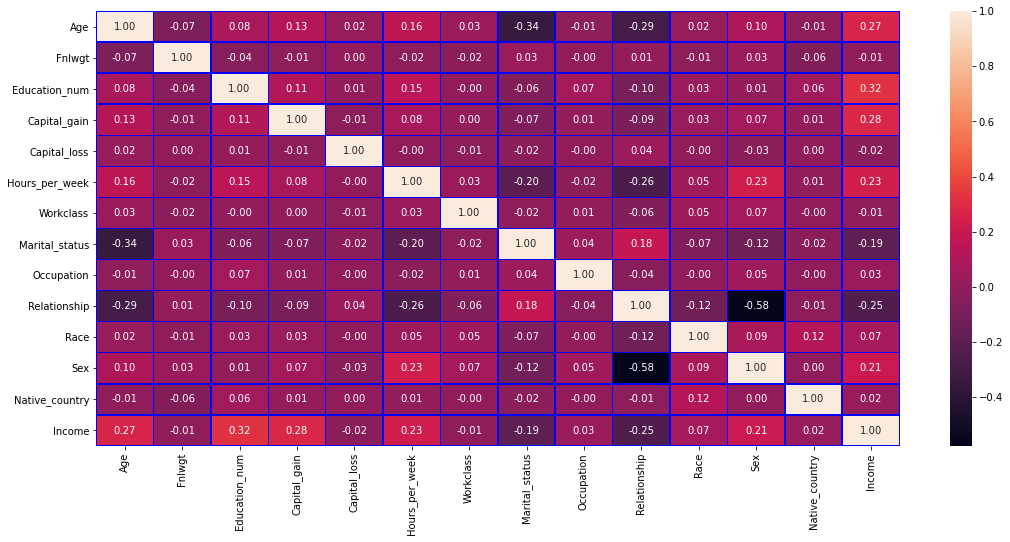

In [53]:
# Visualizing correlation
plt.figure(figsize=(18,8))
sns.heatmap(dff.corr(),annot=True,linewidths=0.5,linecolor='b',fmt='.2f')

Age,Education_num,Capital_gain,Hours_per_week,Relationshhip,Sex has a good correlation with the target variable and Workclass has least correlation.
Sex,Relationship has a strong correlation. Age has good correlation with Marital_status & relationship.

<AxesSubplot:xlabel='Age', ylabel='Education_num'>

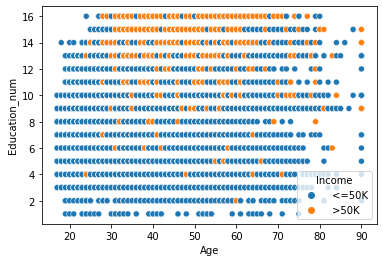

In [54]:
sns.scatterplot(df['Age'],df['Education_num'],hue=df['Income'])

People with high Education_num have high Income irrespective of the age.

<AxesSubplot:xlabel='Hours_per_week', ylabel='Education_num'>

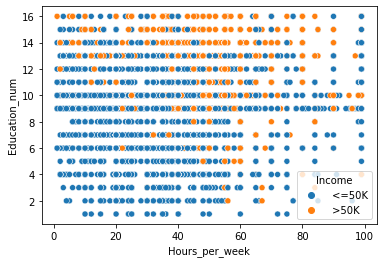

In [55]:
sns.scatterplot(df['Hours_per_week'],df['Education_num'],hue=df['Income'])

Good number of people work till 60 hours per week. A few number of workers earn more than 50k having education number < 8. Income >50k are mosty for the employees having Education_num above 10.

### Dividing dataset in x and y

In [56]:
x=dff.drop('Income',axis=1)
x

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,3.931826,83311.0,13.0,0.000000,0.0,13.0,5,2,3,0,4,1,38
1,3.663562,215646.0,9.0,0.000000,0.0,40.0,3,0,5,1,4,1,38
2,3.988984,234721.0,7.0,0.000000,0.0,40.0,3,2,5,0,2,1,38
3,3.367296,338409.0,13.0,0.000000,0.0,40.0,3,2,9,5,2,0,4
4,3.637586,284582.0,14.0,0.000000,0.0,40.0,3,2,3,5,4,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.332205,257302.0,12.0,0.000000,0.0,38.0,3,2,12,5,4,0,38
32556,3.713572,154374.0,9.0,0.000000,0.0,40.0,3,2,6,0,4,1,38
32557,4.077537,151910.0,9.0,0.000000,0.0,40.0,3,6,0,4,4,0,38
32558,3.135494,201490.0,9.0,0.000000,0.0,20.0,3,4,0,3,4,1,38


In [57]:
y=dff['Income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 29296, dtype: int32

In [58]:
# Checking shapes of x and y 
print('Shape of x : ',x.shape)
print('Shape of y : ',y.shape)

Shape of x :  (29296, 13)
Shape of y :  (29296,)


### Multicollinearity with VIF

In [59]:
# Imporing required libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

calc_vif(x)

,Variables,VIF Factors
0,Age,53.467244
1,Fnlwgt,4.685637
2,Education_num,18.199690
3,Capital_gain,1.114997
4,Capital_loss,1.004335
5,Hours_per_week,15.233596
6,Workclass,8.654949
7,Marital_status,4.011899
8,Occupation,3.351597
9,Relationship,2.677393


In [61]:
# Drop PerformanceRating and check Multicollinearity again
x1=x.drop('Age',axis=1)
calc_vif(x1)

,Variables,VIF Factors
0,Fnlwgt,4.587285
1,Education_num,16.702414
2,Capital_gain,1.112956
3,Capital_loss,1.004019
4,Hours_per_week,13.829560
5,Workclass,8.258958
6,Marital_status,4.011677
7,Occupation,3.323829
8,Relationship,2.662735
9,Race,18.085917


In dataset, among multicolnear columns the features that are contributing less to the output variable can be dropped. We can drop 1-2 columns showing high colinearity but not all as it impacts the output.

Machine learning needs refined dataset. It needs only those columns that are highly contributing to the output. Clean data for which EDA is used. This is for better learning and prediction of data by models.

Once refining is done we'll do Standard Scaler to make all data scaled to mean=0 and std.dev.=+-1, so that prediction could be nearby.

### Scaling : Standard Scaler / Min-Max Scaler

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xs=sc.fit_transform(x1)
x2=pd.DataFrame(xs,columns=x1.columns)
x2

,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,-1.075090,1.200479,-0.295455,-0.040371,-2.413448,1.731402,-0.407908,-0.778143,-0.919718,0.388822,0.717815,0.258195
1,0.321928,-0.437814,-0.295455,-0.040371,0.010333,-0.077555,-1.726319,-0.276929,-0.298687,0.388822,0.717815,0.258195
2,0.523297,-1.256960,-0.295455,-0.040371,0.010333,-0.077555,-0.407908,-0.276929,-0.919718,-1.985772,0.717815,0.258195
3,1.617898,1.200479,-0.295455,-0.040371,0.010333,-0.077555,-0.407908,0.725500,2.185438,-1.985772,-1.393117,-5.396694
4,1.049663,1.610052,-0.295455,-0.040371,0.010333,-0.077555,-0.407908,-0.778143,2.185438,0.388822,-1.393117,0.258195
...,...,...,...,...,...,...,...,...,...,...,...,...
29291,0.761677,0.790906,-0.295455,-0.040371,-0.169207,-0.077555,-0.407908,1.477321,2.185438,0.388822,-1.393117,0.258195
29292,-0.324901,-0.437814,-0.295455,-0.040371,0.010333,-0.077555,-0.407908,-0.026322,-0.919718,0.388822,0.717815,0.258195
29293,-0.350912,-0.437814,-0.295455,-0.040371,0.010333,-0.077555,2.228913,-1.529964,1.564407,0.388822,-1.393117,0.258195
29294,0.172488,-0.437814,-0.295455,-0.040371,-1.785061,-0.077555,0.910503,-1.529964,0.943376,0.388822,0.717815,0.258195


### Find best random state for Train-Test Split

In [63]:
#Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [64]:
#Finding out the best random state

maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=i)
    
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    predtrain=dtc.predict(x_train)
    predtest=dtc.predict(x_test)
    acctrain=accuracy_score(y_train,predtrain)
    acctest=accuracy_score(y_test,predtest)
    #if round(acctrain,1)==round(acctest,1) :
    #    print('Best random state : ',i,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',acctest*100)
        
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i      
print('Final Best random state : ',rs,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',maxAcc*100)

Final Best random state :  66  Accuracy(Training) :  99.9707416979568  Accuracy(Testing) :  81.60200250312892


Here, training & testing accuracies are almost same for random state=66. So, lets take 66 as our best random state.

In [65]:
# train-test split with best randon state and finding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=66)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20507, 12)
(8789, 12)
(20507,)
(8789,)


In [66]:
y_train.value_counts()

0    15873
1     4634
Name: Income, dtype: int64

Huge difference is there in both classes of training set hence balancing the class now.

### Class Imbalance

In [67]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
trainx,trainy=sm.fit_resample(x_train,y_train)

Resampling is done on training dataset as samplng on whole dataset will create unnecessary testing and validation sets which will give misleading results.

In [68]:
trainy.value_counts()

0    15873
1    15873
Name: Income, dtype: int64

### Finding the best algorithm

In [171]:
# Making instance of classifiers
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
xg=GradientBoostingClassifier()

In [174]:
#Executing all algorithms in a single for loop

algo_list=[lr,dtc,knn,rf,xg]
for i in algo_list :
    print(i)
    i.fit(trainx,trainy)
    predtrain=i.predict(trainx)
    predtest=i.predict(x_test)
    acctrain=accuracy_score(trainy,predtrain)
    acctest=accuracy_score(y_test,predtest)
    err=mean_absolute_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100,' Mean absolute error : ',err)
    print(confusion_matrix(y_test,predtest))
    print(classification_report(y_test,predtest))
    print('\n')

LogisticRegression()
Accuracy(Training) :  74.85352485352486  Accuracy(Test)  73.88781431334623  Mean absolute error :  0.2611218568665377
[[5091 1794]
 [ 501 1403]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      6885
           1       0.44      0.74      0.55      1904

    accuracy                           0.74      8789
   macro avg       0.67      0.74      0.68      8789
weighted avg       0.81      0.74      0.76      8789



DecisionTreeClassifier()
Accuracy(Training) :  99.98424998424998  Accuracy(Test)  79.69052224371373  Mean absolute error :  0.20309477756286268
[[5788 1097]
 [ 688 1216]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      6885
           1       0.53      0.64      0.58      1904

    accuracy                           0.80      8789
   macro avg       0.71      0.74      0.72      8789
weighted avg       0.81      0.80      0.80      8789



KNeig

RandomForestClassifier has the highest accuracy but let's go for cross validation for all the models used.

In [175]:
# Computing cross validation score of all the models used
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',cross_val_score(i,x2,y,cv=5).mean())

CV mean of  LogisticRegression()  is  0.8231842496622855
CV mean of  DecisionTreeClassifier()  is  0.8014062493628715
CV mean of  KNeighborsClassifier()  is  0.8198389048207391
CV mean of  RandomForestClassifier()  is  0.8368378160957706
CV mean of  GradientBoostingClassifier()  is  0.8594690936670458


Looking at difference of accuracy and cv mean, opting for RandomForestClassifier as our best model with accuracy of 85% and having least difference between accuracy and cv mean.

### Hyperparameter Tuning

In [125]:
# Using hyper parameter tuning on selected model for better accuracy and to avoid overfitting issues
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini', 'entropy'],
              'max_features':['auto', 'sqrt', 'log2'],
              'class_weight':['balanced','balanced_subsample',None],
              'min_samples_leaf':[1,2,3]}
              #'verbose':[0,1,2,3,4,5],
              #'n_estimators':[10,50,100]}

rf=RandomForestClassifier()
GCV=GridSearchCV(rf,parameters,cv=5)
GCV.fit(trainx,trainy)
GCV.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 1}

Using hyper parameter tuning for better accuracy and to avoid overfitting issues with best parameters on selected model.

In [176]:
rf=RandomForestClassifier(class_weight=None,criterion='entropy',max_features='auto',min_samples_leaf=1)
rf.fit(trainx,trainy)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
cv=cross_val_score(rf,x2,y,cv=5).mean()

print('Accuracy : ',acc,' CV mean : ',cv)

Accuracy :  0.8380930708840596  CV mean :  0.8377935756489098


#### We are getting model accuracy as 83% and cv mean as 0.83 for both the parameter sets, this shows our model is performing good.

### AUC-ROC Curve

In [191]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf=RandomForestClassifier(class_weight=None,criterion='entropy',max_features='auto',min_samples_leaf=1)
rf.fit(trainx,trainy)
pred=rf.predict(x_test)
acc1=accuracy_score(y_test,pred)

Applying AUC-ROC curve on selected model i.e. RandomForestClassifier()

In [192]:
pred_proba=xg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_proba)
print(fpr,tpr,thresholds)

[0.         0.         0.         ... 0.99869281 0.9989833  1.        ] [0.00000000e+00 5.25210084e-04 1.05042017e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00] [1.98735141 0.98735141 0.98563195 ... 0.00799018 0.00778582 0.00513934]


Calculating fpr,tpr,thresholds for selected model

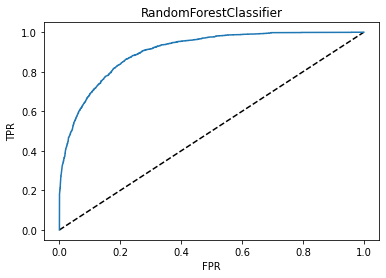

In [193]:
# Plotting the curve

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForestClassifier')
plt.show()

In [194]:
auc_score=roc_auc_score(y_test,pred_proba)
print('Accuracy : ',acc1)
print('ROC_AUC score : ',auc_score)

Accuracy :  0.8368415064284902
ROC_AUC score :  0.9048457781805533


Getting good accuracy score and AUC-ROC score for the model selected

### Saving the model

In [195]:
# Saved the model in .pkl file
import pickle #import joblib
file='census.pkl'
pickle.dump(rf,open(file,'wb'))

### Conclusion

In [196]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.8368415064284902

In [197]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(8789, 12)
(8789,)


In [198]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(rf.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':predicted})
conclusion[10:40]

,Orignal,Predicted
10,0,0
11,1,0
12,0,0
13,0,0
14,0,0
15,1,1
16,0,0
17,0,0
18,0,0
19,1,1
